In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
#%timeit ,  line_profiler, memory_profiler

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


def knn(X_train,y_train,X_test, y_test, nei):
    neigh = KNeighborsClassifier(n_neighbors=nei)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    if nei == 13:
        cm = confusion_matrix(y_pred, y_test)
        print_cm(cm, 'KNN nei='+str(nei))
    return f1_score(y_test,y_pred, average='micro'), neigh.score(X_test,y_test)

def logreg(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs',  C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return f1_score(y_test,y_pred, average='micro')

def logreg2(X_train,y_train,X_test, y_test, k):
    lr = LogisticRegression(random_state=0, solver='lbfgs', C=k,
                            multi_class='multinomial').fit(X_train, y_train)
    y_pred = lr.predict(X_train)
    return f1_score(y_train,y_pred, average='micro')

def rndfo(X_train,y_train,X_test, y_test, k):
    clf = RandomForestClassifier(n_estimators=k, max_depth=2,
                            random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'),clf.score(X_test,y_test)

def svc(X_train,y_train,X_test, y_test, k):
    svm = SVC(gamma=k)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'), svm.score(X_test,y_test)

def dtre(X_train,y_train,X_test, y_test, k):
    tr = DecisionTreeClassifier(random_state=0, max_depth=k)
    tr.fit(X_train, y_train)
    y_pred = tr.predict(X_test)
    return f1_score(y_test,y_pred, average='micro'), tr.score(X_test,y_test)

In [3]:
def print_cm(cm, title=''):
    fig, ax = plt.subplots(figsize=(3,3))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['','']
    plt.title('Confusion Matrix '+str(title))
    plt.ylabel('True label')
    plt.xlabel('')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j-0.3,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [4]:
def test(method, X_train ,y_train,X_test, y_test, k, alist):
    dic={}
    d2= {}
    for k in alist:
        s1, s2 = method(X_train,y_train,X_test, y_test,k)
        dic[k]=s1  
        d2[k]=s2
    return dic,d2

def plot(dic):
    colors = list("rgbcmykrgbcmyk")
    o = 0
    m = 0
    n = 0
    for key in dic:
        o = m
        m = max(m,dic[key])
        if o !=  m:
            n = key
        plt.scatter(key, dic[key], label=key,color=colors.pop());
    plt.legend()
    plt.title('best: '+str(n)+" -> "+str(round(m,4)))
    plt.show();

In [5]:
cookies = pd.read_csv('data/cookies_dummies.csv')

In [ ]:
Y = cookies['quality']
X = cookies.drop(columns='quality')

In [49]:
X.head()
Y.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,weight,crunch factor,aesthetic appeal,raisins,oats,nuts,peanut butter,cubed,melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,1.30,3,1,0,0,0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,1.71,3,1,0,0,0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,1.78,3,0,0,1,0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,1.59,3,0,0,0,0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,1.30,3,0,1,1,0,1,0


0    1
1    0
2    1
3    0
4    0
Name: quality, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size= 0.2, shuffle=True, random_state=42)

In [92]:
from sklearn.preprocessing import MinMaxScaler

def df_scaled(df):
    scaled = MinMaxScaler(feature_range = (-1, 1)).fit_transform(df.values)
    out = pd.DataFrame(scaled, index=df.index, columns=df.columns)
    return out

In [93]:
#X_train = df_scaled(X_train)
#X_test = df_scaled(X_test)

In [70]:
X_train.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,weight,crunch factor,aesthetic appeal,raisins,oats,nuts,peanut butter,cubed,melted
1943,0.27,1.7,340,25.0,122.0,0.99088,7.97,0.51,11.9,15.8,1.08,3,0,0,0,0,0,1
3400,0.00,1.8,660,34.0,52.0,0.99760,8.62,0.68,9.9,13.6,1.58,3,0,1,1,0,1,0
843,0.00,2.2,950,48.0,59.0,0.99541,8.61,0.70,11.5,13.0,1.41,3,0,1,1,0,1,0
2580,0.26,6.5,420,32.0,160.0,0.99440,8.14,0.47,10.7,15.2,1.30,3,0,0,0,0,0,1
4607,0.28,9.6,510,26.0,157.0,0.99690,8.12,0.53,9.2,15.0,1.51,3,1,0,0,0,0,1


In [71]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
y_pred = neigh.predict(X_test)
y_2 = neigh.predict(X_train)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_train,y_2))

neigh.score(X_test, y_test)
neigh.score(X_train, y_2)

0.7706422018348624
1.0


0.7706422018348624

1.0

In [66]:
from sklearn.ensemble import RandomForestRegressor

def getRFR(depth, X_train, y_train):
    regr = RandomForestRegressor(max_depth=depth)
    regr.fit(X_train, y_train)  
    #y_pred = regr.predict(X_test)
    return regr.score(X_test, y_test)

def getYRFR(depth, X_train, y_train):
    regr = RandomForestRegressor(max_depth=depth)
    regr.fit(X_train, y_train)  
    return regr.predict(X_test)


def knn1(X_train,y_train,X_test, y_test, nei):
    neigh = KNeighborsClassifier(n_neighbors=nei)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    return f1_score(y_test,y_pred, average='micro')#, neigh.score(X_test,y_test)

def knn2(X_train,y_train,X_test, y_test, nei):
    neigh = KNeighborsClassifier(n_neighbors=nei)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_train)
    return neigh.score(X_train,y_pred)
    #return f1_score(y_test,y_pred, average='micro'), 


In [90]:
def compare(method_test,method_train, alist):
    li=[]
    test=[]
    ks = alist
    for f in ks:
        #li.append(getRFR(f,X_train, y_train))
        #test.append(getRFR(f,X_test, y_test))
        r = method_test(X_train,y_train,X_test, y_test,f)
        t = method_train(X_train,y_train,X_test, y_test,f)
        print(r,t)
        li.append(r)
        test.append(t)

    li

    plt.plot(ks,li, label='test',color='blue');
    plt.plot(ks, test, label='train',color='orange');

    plt.legend()
    plt.show();

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


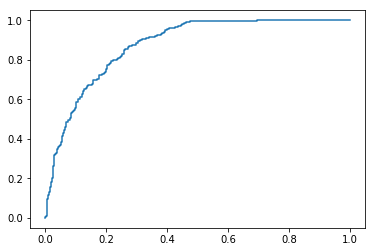

In [103]:


from sklearn import metrics

ks_model = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
#Consider a binary classification for labels 0 and 1.

#Predict will give either 0 or 1 as output
#Predict_proba will give the only probability of 1.

y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr);

0.7838939857288482 1.0
0.7951070336391437 1.0
0.8053007135575942 1.0
0.7981651376146789 1.0


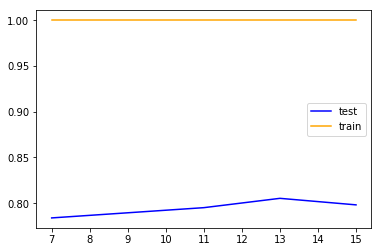

In [96]:
compare(knn1,knn2,[7,11,13,15])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8022426095820592 0.7979591836734693


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.7956632653061224


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.7936224489795919


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.8015306122448981


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7900101936799184 0.7933673469387755


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7951070336391437 0.7951530612244898


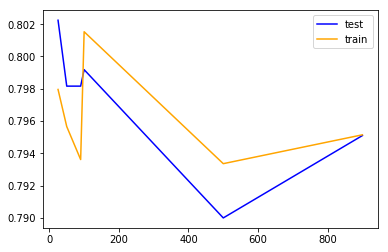

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.8015306122448981


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8022426095820592 0.7956632653061224


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7971457696228339 0.7913265306122449


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.7954081632653061


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7961264016309887 0.7948979591836736


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7849133537206932 0.7943877551020408


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.7941326530612245


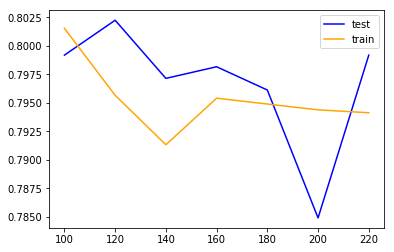

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8103975535168195 0.8017857142857143


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.799184505606524 0.7946428571428572


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7920489296636085 0.7948979591836736


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7981651376146789 0.7931122448979592


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8042813455657493 0.8010204081632653


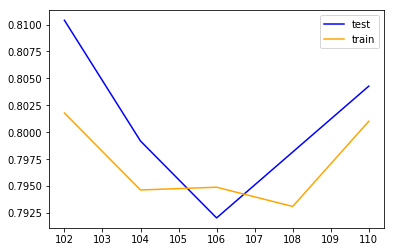

In [102]:
compare(logreg,logreg2,[25,50,90,100,500,900])
compare(logreg,logreg2,[100,120,140,160,180,200,220])
compare(logreg,logreg2,[102,104,106,108,110])

In [84]:
print("LogisticRegression")
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#param_grid = {'C':np.arange(0.01,100,10)}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10,n_jobs=-1, verbose=True)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

LogisticRegression
Parameter grid:
{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']}
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   12.6s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

Test set score: 0.80
Best parameters: {'C': 1000.0, 'penalty': 'l1'}
Best cross-validation score: 0.81


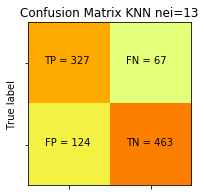

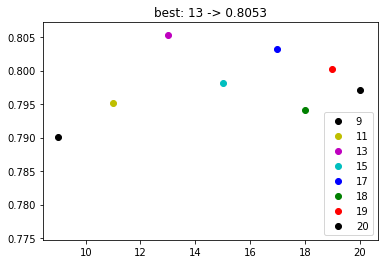

In [54]:
dic, d2 = test(knn, X_train ,y_train,X_test, y_test, 3, [9,11,13,15,17,18,19,20])
plot(dic)

logistic regression

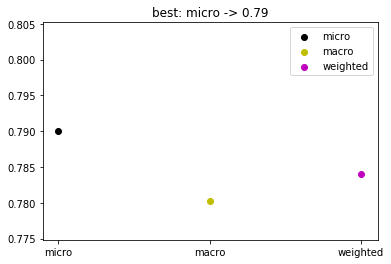

In [17]:
dic, d2 = test(logreg, X_train ,y_train,X_test,
           y_test, 0, ['micro','macro','weighted'])
plot(dic)

random forest

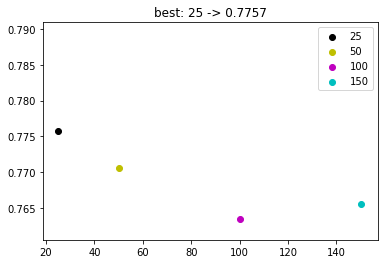

In [18]:
dic, d2 = test(rndfo, X_train ,y_train,X_test,
           y_test, 0, [25, 50,100, 150])
plot(dic)

svc

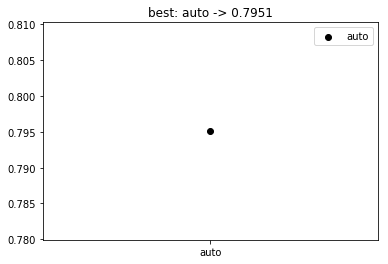

In [19]:
dic, d2 = test(svc, X_train ,y_train,X_test,
           y_test, 0, ['auto'])#,'rbf','poly','sigmoid'])
plot(dic)

desicion tree

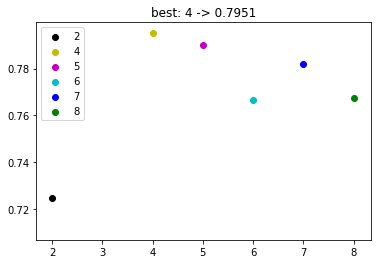

In [20]:
dic, d2 = test(dtre, X_train ,y_train,X_test,
           y_test, 0, [2,4,5,6,7,8])
plot(dic)